# Classification

## Descision Trees and Decision Rules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("mutations.csv")
df.head()

,class,GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T,TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A,KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T,SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T,MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T,LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,NPAT_GRCh37_11:108032094-108032094_Missense-Mutation_SNP_G-G-T_G-G-A,ARNTL_GRCh37_11:13402723-13402723_Silent_SNP_G-G-A,COPB1_GRCh37_11:14480092-14480092_Missense-Mutation_SNP_G-G-A_G-G-T,...,ZNF610_GRCh37_19:52856965-52856965_Missense-Mutation_SNP_G-G-A,RNPEPL1_GRCh37_2:241516310-241516310_Missense-Mutation_SNP_C-C-T,YTHDC2_GRCh37_5:112889319-112889319_Missense-Mutation_SNP_G-G-A,DCBLD1_GRCh37_6:117853550-117853550_Missense-Mutation_SNP_C-C-T,TBX5_GRCh37_12:114792393-114792393_3'UTR_SNP_T-T-A,VPS37A_GRCh37_8:17153149-17153149_3'UTR_DEL_A-A--,SRGAP3_GRCh37_3:9023972-9023972_3'UTR_DEL_A-A--,KMT2C_GRCh37_7:151836804-151836804_Nonsense-Mutation_SNP_G-G-A,CDKN1C_GRCh37_11:2904846-2904846_3'UTR_DEL_T-T--,LMO7_GRCh37_13:76432354-76432354_3'UTR_SNP_C-C-T
0,NC1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,C1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NC2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NC3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NC4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
diff_dict = {}

for column in df.columns:
    TP = len(df[(df[column]==1) & (df["class"].str.startswith('C'))])
    FP = len(df[(df[column]==1) & (df["class"].str.startswith('NC'))])
    
    diff_dict[column] = TP - FP
      
diff_dict

{'class': 0,
 'GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T': -1,
 'TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A': 0,
 'KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T': 1,
 'SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T': 0,
 'MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T': 0,
 'LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--': 2,
 'NPAT_GRCh37_11:108032094-108032094_Missense-Mutation_SNP_G-G-T_G-G-A': 1,
 'ARNTL_GRCh37_11:13402723-13402723_Silent_SNP_G-G-A': 0,
 'COPB1_GRCh37_11:14480092-14480092_Missense-Mutation_SNP_G-G-A_G-G-T': 1,
 'PDE3B_GRCh37_11:14882800-14882800_Missense-Mutation_SNP_G-G-A': 0,
 'MADD_GRCh37_11:47348331-47348331_Nonsense-Mutation_SNP_C-C-T': 0,
 'OR5F1_GRCh37_11:55761178-55761178_Silent_SNP_T-T-C': 0,
 'OR8H2_GRCh37_11:55873241-55873241_Silent_SNP_C-C-T': 1,
 'LPXN_GRCh37_11:58331628-58331628_Missense-Mutation_SNP_C-C-A': -1,
 'PACS1_GRCh37_11:65983994-65983994_Misse

In [5]:
del diff_dict['class']  

In [6]:
diff_df = pd.DataFrame(diff_dict, index=[0])
diff_df.index = ['TP-FP']
diff_df = diff_df.transpose()
table1 = diff_df.sort_values(by="TP-FP", ascending=False)
table1.head(10)

,TP-FP
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,11
PTEN_GRCh37_10:89692905-89692905_Missense-Mutation_SNP_G-G-A_G-G-T_G-G-C,10
PID1_GRCh37_2:229889189-229889189_3'Flank_DEL_A-A--,10
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G,10
SHC1_GRCh37_1:154935863-154935863_3'UTR_DEL_G-G--,9
POLE_GRCh37_12:133253184-133253184_Missense-Mutation_SNP_G-G-C,9
PTEN_GRCh37_10:89692904-89692904_Missense-Mutation_SNP_C-C-G,8
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,8
DPP4_GRCh37_2:162849046-162849046_3'UTR_DEL_T-T--,8
BCOR_GRCh37_X:39921444-39921444_Missense-Mutation_SNP_T-T-C,8


In [7]:
max_diff = table1.head(1).index[0]
max_diff_val = table1.loc[table1.head(1).index[0], "TP-FP"]

print(f"The max gene is {max_diff} with {max_diff_val} values. Therefore, this is the most useful feature for classification")


The max gene is RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C-- with 11 values. Therefore, this is the most useful feature for classification


### let's call the most useful gene, F

In [8]:
F = max_diff
F

'RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--'

### Group A and Group B

In [9]:
group_a = df[df[F]==1]
group_a

,class,GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T,TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A,KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T,SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T,MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T,LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,NPAT_GRCh37_11:108032094-108032094_Missense-Mutation_SNP_G-G-T_G-G-A,ARNTL_GRCh37_11:13402723-13402723_Silent_SNP_G-G-A,COPB1_GRCh37_11:14480092-14480092_Missense-Mutation_SNP_G-G-A_G-G-T,...,ZNF610_GRCh37_19:52856965-52856965_Missense-Mutation_SNP_G-G-A,RNPEPL1_GRCh37_2:241516310-241516310_Missense-Mutation_SNP_C-C-T,YTHDC2_GRCh37_5:112889319-112889319_Missense-Mutation_SNP_G-G-A,DCBLD1_GRCh37_6:117853550-117853550_Missense-Mutation_SNP_C-C-T,TBX5_GRCh37_12:114792393-114792393_3'UTR_SNP_T-T-A,VPS37A_GRCh37_8:17153149-17153149_3'UTR_DEL_A-A--,SRGAP3_GRCh37_3:9023972-9023972_3'UTR_DEL_A-A--,KMT2C_GRCh37_7:151836804-151836804_Nonsense-Mutation_SNP_G-G-A,CDKN1C_GRCh37_11:2904846-2904846_3'UTR_DEL_T-T--,LMO7_GRCh37_13:76432354-76432354_3'UTR_SNP_C-C-T
0,NC1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
60,C24,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
61,C25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,C27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,C28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,C29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,C41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,C66,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,C84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,C102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
group_b = df[df[F]==0]
group_b

,class,GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T,TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A,KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T,SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T,MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T,LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,NPAT_GRCh37_11:108032094-108032094_Missense-Mutation_SNP_G-G-T_G-G-A,ARNTL_GRCh37_11:13402723-13402723_Silent_SNP_G-G-A,COPB1_GRCh37_11:14480092-14480092_Missense-Mutation_SNP_G-G-A_G-G-T,...,ZNF610_GRCh37_19:52856965-52856965_Missense-Mutation_SNP_G-G-A,RNPEPL1_GRCh37_2:241516310-241516310_Missense-Mutation_SNP_C-C-T,YTHDC2_GRCh37_5:112889319-112889319_Missense-Mutation_SNP_G-G-A,DCBLD1_GRCh37_6:117853550-117853550_Missense-Mutation_SNP_C-C-T,TBX5_GRCh37_12:114792393-114792393_3'UTR_SNP_T-T-A,VPS37A_GRCh37_8:17153149-17153149_3'UTR_DEL_A-A--,SRGAP3_GRCh37_3:9023972-9023972_3'UTR_DEL_A-A--,KMT2C_GRCh37_7:151836804-151836804_Nonsense-Mutation_SNP_G-G-A,CDKN1C_GRCh37_11:2904846-2904846_3'UTR_DEL_T-T--,LMO7_GRCh37_13:76432354-76432354_3'UTR_SNP_C-C-T
1,C1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NC2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NC3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NC4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,C2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NC141,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
267,C127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
268,C128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,NC142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
groupa_list = group_a["class"].tolist()
groupa_list

['NC1',
 'C24',
 'C25',
 'C27',
 'C28',
 'C29',
 'C41',
 'C66',
 'C84',
 'C102',
 'C104',
 'C123',
 'C124']

In [12]:
len(groupa_list)

13

In [13]:
groupb_list = group_b['class'].tolist()
groupb_list

['C1',
 'NC2',
 'NC3',
 'NC4',
 'C2',
 'C3',
 'NC5',
 'C4',
 'NC6',
 'C5',
 'NC7',
 'NC8',
 'NC9',
 'C6',
 'NC10',
 'NC11',
 'NC12',
 'C7',
 'NC13',
 'C8',
 'C9',
 'NC14',
 'C10',
 'C11',
 'C12',
 'NC15',
 'NC16',
 'C13',
 'C14',
 'NC17',
 'NC18',
 'NC19',
 'C15',
 'NC20',
 'NC21',
 'NC22',
 'C16',
 'NC23',
 'NC24',
 'NC25',
 'NC26',
 'NC27',
 'NC28',
 'NC29',
 'C17',
 'C18',
 'NC30',
 'NC31',
 'C19',
 'NC32',
 'NC33',
 'NC34',
 'C20',
 'C21',
 'NC35',
 'NC36',
 'C22',
 'NC37',
 'C23',
 'C26',
 'NC38',
 'NC39',
 'NC40',
 'C30',
 'C31',
 'C32',
 'NC41',
 'NC42',
 'NC43',
 'NC44',
 'NC45',
 'C33',
 'NC46',
 'C34',
 'NC47',
 'C35',
 'NC48',
 'C36',
 'C37',
 'C38',
 'NC49',
 'C39',
 'C40',
 'NC50',
 'C42',
 'NC51',
 'NC52',
 'C43',
 'NC53',
 'C44',
 'NC54',
 'C45',
 'C46',
 'C47',
 'C48',
 'NC55',
 'C49',
 'C50',
 'C51',
 'NC56',
 'NC57',
 'NC58',
 'NC59',
 'C52',
 'NC60',
 'NC61',
 'NC62',
 'C53',
 'C54',
 'C55',
 'NC63',
 'C56',
 'NC64',
 'C57',
 'NC65',
 'C58',
 'NC66',
 'C59',
 'C60',


In [14]:
len(groupb_list)

258

### Okay, lets make a confusion matrix for samples with mutation F

In [15]:
actual_values = df["class"].str.startswith('C').astype(int)
actual_values

0      0
1      1
2      0
3      0
4      0
      ..
266    0
267    1
268    1
269    0
270    1
Name: class, Length: 271, dtype: int64

In [16]:
predicted_values = df[F]
predicted_values

0      1
1      0
2      0
3      0
4      0
      ..
266    0
267    0
268    0
269    0
270    0
Name: RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--, Length: 271, dtype: int64

### Now we have the confusion Matrix for F

In [17]:
confusion_matrix = [[0,0],
                    [0,0]]

for actual,predicted in zip(actual_values, predicted_values):
    if actual == 1:
        if predicted == 1:
            confusion_matrix[0][0] += 1
        else:
            confusion_matrix[0][1] += 1
    else: 
        if predicted == 1:
            confusion_matrix[1][0] += 1
        else:
            confusion_matrix[1][1] += 1
            
confusion_matrix

[[12, 117], [1, 141]]

### Plot the confusion Matrix

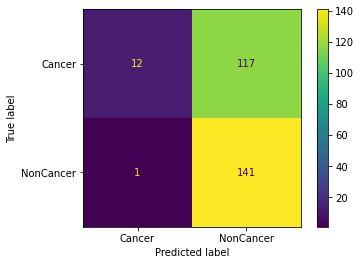

In [18]:
disp = ConfusionMatrixDisplay(np.array(confusion_matrix), display_labels=['Cancer', 'NonCancer'])
disp.plot()

## Part 2 Lets build a Classifier

### MostUseful and TopUseful functions do the same thing. one returns the single maximum key and value, while the other returns the entire dictionary


In [24]:
def MostUsefulFeature(df):
    diff={}

    for col in df.columns[1:]:
        TP = len(df[(df[col]==1) & (df.iloc[:,0].str.startswith('C'))])
        FP = len(df[(df[col]==1) & (df.iloc[:,0].str.startswith('NC'))])

        diff[col] = TP-FP
        
        
    # return [max(diff, key=diff.get), max(diff.values())]
    return max(diff, key=diff.get)

In [20]:
def TopUsefulFeatures(df):
    diff={}

    for col in df.columns[1:]:
        TP = len(df[(df[col]==1) & (df.iloc[:,0].str.startswith('C'))])
        FP = len(df[(df[col]==1) & (df.iloc[:,0].str.startswith('NC'))])

        diff[col] = TP-FP
        
        
    return diff

### Top 10 in node A

In [25]:
MUF = MostUsefulFeature(df)
MUF

'RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--'

In [26]:
diff_ga = pd.DataFrame(TopUsefulFeatures(group_a.drop(MUF, axis=1)), index=[0])
diff_ga.index = ['TP-FP']
diff_ga = diff_ga.transpose()
table1_ga = diff_ga.sort_values(by="TP-FP", ascending=False)
table1_ga.head(10)

,TP-FP
PID1_GRCh37_2:229889189-229889189_3'Flank_DEL_A-A--,5
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,5
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,4
ANKRD20A8P_GRCh37_2:95483039-95483039_RNA_DEL_T-T--,4
DPP4_GRCh37_2:162849046-162849046_3'UTR_DEL_T-T--,4
SHC1_GRCh37_1:154935863-154935863_3'UTR_DEL_G-G--,4
NCOA3_GRCh37_20:46282985-46282985_3'Flank_DEL_T-T--,4
SETD1B_GRCh37_12:122242658-122242658_Frame-Shift-Del_DEL_C-C--,4
CREBRF_GRCh37_5:172563408-172563408_3'UTR_DEL_A-A--,3
EPHA2_GRCh37_1:16462199-16462199_Frame-Shift-Del_DEL_G-G--,3


### Top 10 in node B

In [27]:
diff_gb = pd.DataFrame(TopUsefulFeatures(group_b.drop(MUF, axis=1)), index=[0])
diff_gb.index = ['TP-FP']
diff_gb = diff_gb.transpose()
table1_gb = diff_gb.sort_values(by="TP-FP", ascending=False)
table1_gb.head(10)

,TP-FP
PTEN_GRCh37_10:89692905-89692905_Missense-Mutation_SNP_G-G-A_G-G-T_G-G-C,10
POLE_GRCh37_12:133253184-133253184_Missense-Mutation_SNP_G-G-C,9
ARID1A_GRCh37_1:27106354-27106354_Nonsense-Mutation_SNP_C-C-T,9
PTEN_GRCh37_10:89692904-89692904_Missense-Mutation_SNP_C-C-G,8
PTEN_GRCh37_10:89624245-89624245_Nonsense-Mutation_SNP_G-G-T,8
BCOR_GRCh37_X:39921444-39921444_Missense-Mutation_SNP_T-T-C,7
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G,7
ZNF878_GRCh37_19:12154972-12154972_Missense-Mutation_SNP_C-C-T,7
POLE_GRCh37_12:133250289-133250289_Missense-Mutation_SNP_C-C-A_C-C-G,6
DYM_GRCh37_18:46906113-46906113_Missense-Mutation_SNP_C-C-T,6


### Confusion Matrix for node A and B

In [32]:
actual_a= group_a["class"].str.startswith('C').astype(int)
actual_b= group_b["class"].str.startswith('C').astype(int)

In [30]:
ga = group_a.drop(MUF, axis=1)
MUA = MostUsefulFeature(ga)
MUA

'RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--'

In [31]:
gb = group_b.drop(MUF, axis=1)
MUB = MostUsefulFeature(gb)
MUB

'PTEN_GRCh37_10:89692905-89692905_Missense-Mutation_SNP_G-G-A_G-G-T_G-G-C'

In [33]:
predicted_a = group_a[MUA]
predicted_b = group_b[MUB]
#  find computation of MUA and MUB in classifier: level 2 groupings 

### confusion Matrix A

In [34]:
confusion_matrix_a = [[0,0],
                    [0,0]]

for actual,predicted in zip(actual_a, predicted_a):
    if actual == 1:
        if predicted == 1:
            confusion_matrix_a[0][0] += 1
        else:
            confusion_matrix_a[0][1] += 1
    else: 
        if predicted == 1:
            confusion_matrix_a[1][0] += 1
        else:
            confusion_matrix_a[1][1] += 1
            
confusion_matrix_a

[[5, 7], [0, 1]]

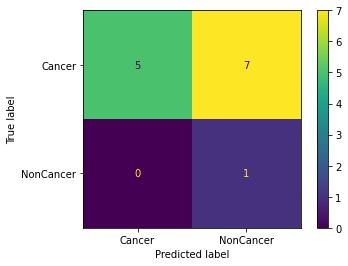

In [35]:
disp_a = ConfusionMatrixDisplay(np.array(confusion_matrix_a), display_labels=['Cancer', 'NonCancer'])
disp_a.plot()

In [36]:
confusion_matrix_b = [[0,0],
                    [0,0]]

for actual,predicted in zip(actual_b, predicted_b):
    if actual == 1:
        if predicted == 1:
            confusion_matrix_b[0][0] += 1
        else:
            confusion_matrix_b[0][1] += 1
    else: 
        if predicted == 1:
            confusion_matrix_b[1][0] += 1
        else:
            confusion_matrix_b[1][1] += 1
            
confusion_matrix_b

[[15, 102], [5, 136]]

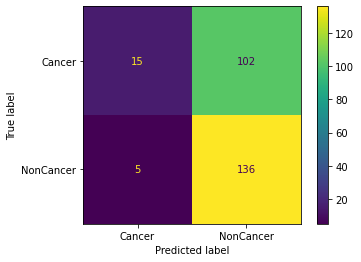

In [37]:
disp_b = ConfusionMatrixDisplay(np.array(confusion_matrix_b), display_labels=['Cancer', 'NonCancer'])
disp_b.plot()

### First level of Classifier

In [38]:
def Classify(df:pd.DataFrame, sample, MUF):
    sample = df[df["class"]==sample]
    if sample[MUF].iloc[0] == 1:
        return "C sample"   
    elif sample[MUF].iloc[0] == 0:
        return "NC sample"

        

In [39]:
Classify(df, "C1", MUF)

'NC sample'

## Classifier: level two 

In [40]:
ga.loc[:, MUA]

0      0
60     1
61     0
63     1
65     1
67     1
89     0
139    0
166    0
201    0
203    1
242    0
243    0
Name: RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--, dtype: int64

### classification rules for decision tree

In [41]:
# group_a = df[df[F]==1]
# group_b = df[df[F]==0]

# ga = group_a.drop(MUF, axis=1)
# MUA = MostUsefulFeature(ga)[0]

# gb = group_b.drop(MUF, axis=1)
# MUB = MostUsefulFeature(gb)[0]
def Classify2(df:pd.DataFrame, sample, MUF, MUA, MUB):
    sample = df[df["class"]==sample]
    # sample = df.iloc[[sample]]
    if sample[MUF].iloc[0] == 1:
        if sample[MUA].iloc[0] == 1: 
            return "C"  
        else:
            return "NC"  
     
    elif sample[MUF].iloc[0] == 0:
        if sample[MUB].iloc[0] == 1: 
            return "C"  
        else:
            return "NC"  
    


In [42]:
Classify2(df, 'NC141' , MUF, MUA, MUB)

'C'

In [43]:
answer = {}
for i in ['C1', 'C10', 'C50', 'NC5', 'NC15']:
    answer[i] = Classify2(df, i , MUF, MUA, MUB)
    
answer
    

{'C1': 'NC', 'C10': 'NC', 'C50': 'NC', 'NC5': 'NC', 'NC15': 'NC'}

In [44]:
my_map = {}
for i in range(len(df)):
    check = df.loc[i]['class']
    my_map[check] = Classify2(df, df.loc[i, 'class'] , MUF, MUA, MUB)
   
    
my_map


{'NC1': 'NC',
 'C1': 'NC',
 'NC2': 'C',
 'NC3': 'NC',
 'NC4': 'NC',
 'C2': 'NC',
 'C3': 'NC',
 'NC5': 'NC',
 'C4': 'NC',
 'NC6': 'NC',
 'C5': 'NC',
 'NC7': 'NC',
 'NC8': 'NC',
 'NC9': 'NC',
 'C6': 'NC',
 'NC10': 'NC',
 'NC11': 'NC',
 'NC12': 'C',
 'C7': 'NC',
 'NC13': 'NC',
 'C8': 'NC',
 'C9': 'NC',
 'NC14': 'NC',
 'C10': 'NC',
 'C11': 'NC',
 'C12': 'NC',
 'NC15': 'NC',
 'NC16': 'NC',
 'C13': 'C',
 'C14': 'NC',
 'NC17': 'C',
 'NC18': 'NC',
 'NC19': 'NC',
 'C15': 'C',
 'NC20': 'NC',
 'NC21': 'NC',
 'NC22': 'NC',
 'C16': 'NC',
 'NC23': 'NC',
 'NC24': 'NC',
 'NC25': 'NC',
 'NC26': 'NC',
 'NC27': 'NC',
 'NC28': 'NC',
 'NC29': 'NC',
 'C17': 'C',
 'C18': 'NC',
 'NC30': 'NC',
 'NC31': 'NC',
 'C19': 'NC',
 'NC32': 'NC',
 'NC33': 'NC',
 'NC34': 'NC',
 'C20': 'NC',
 'C21': 'NC',
 'NC35': 'NC',
 'NC36': 'NC',
 'C22': 'NC',
 'NC37': 'NC',
 'C23': 'NC',
 'C24': 'C',
 'C25': 'NC',
 'C26': 'NC',
 'C27': 'C',
 'NC38': 'NC',
 'C28': 'C',
 'NC39': 'NC',
 'C29': 'C',
 'NC40': 'NC',
 'C30': 'NC',
 'C31': 

In [45]:
df[df['class']=='NC15'].loc[:,MUB]

26    0
Name: PTEN_GRCh37_10:89692905-89692905_Missense-Mutation_SNP_G-G-A_G-G-T_G-G-C, dtype: int64

## Evaluation of Classification

In [46]:
result = {}
tester_class = df['class'].tolist()
for i in range(len(tester_class)):
    result[tester_class[i]] = Classify2(df, tester_class[i] , MUF, MUA, MUB)
    
result

{'NC1': 'NC',
 'C1': 'NC',
 'NC2': 'C',
 'NC3': 'NC',
 'NC4': 'NC',
 'C2': 'NC',
 'C3': 'NC',
 'NC5': 'NC',
 'C4': 'NC',
 'NC6': 'NC',
 'C5': 'NC',
 'NC7': 'NC',
 'NC8': 'NC',
 'NC9': 'NC',
 'C6': 'NC',
 'NC10': 'NC',
 'NC11': 'NC',
 'NC12': 'C',
 'C7': 'NC',
 'NC13': 'NC',
 'C8': 'NC',
 'C9': 'NC',
 'NC14': 'NC',
 'C10': 'NC',
 'C11': 'NC',
 'C12': 'NC',
 'NC15': 'NC',
 'NC16': 'NC',
 'C13': 'C',
 'C14': 'NC',
 'NC17': 'C',
 'NC18': 'NC',
 'NC19': 'NC',
 'C15': 'C',
 'NC20': 'NC',
 'NC21': 'NC',
 'NC22': 'NC',
 'C16': 'NC',
 'NC23': 'NC',
 'NC24': 'NC',
 'NC25': 'NC',
 'NC26': 'NC',
 'NC27': 'NC',
 'NC28': 'NC',
 'NC29': 'NC',
 'C17': 'C',
 'C18': 'NC',
 'NC30': 'NC',
 'NC31': 'NC',
 'C19': 'NC',
 'NC32': 'NC',
 'NC33': 'NC',
 'NC34': 'NC',
 'C20': 'NC',
 'C21': 'NC',
 'NC35': 'NC',
 'NC36': 'NC',
 'C22': 'NC',
 'NC37': 'NC',
 'C23': 'NC',
 'C24': 'C',
 'C25': 'NC',
 'C26': 'NC',
 'C27': 'C',
 'NC38': 'NC',
 'C28': 'C',
 'NC39': 'NC',
 'C29': 'C',
 'NC40': 'NC',
 'C30': 'NC',
 'C31': 

In [47]:
result_df = pd.DataFrame(result, index=[0])
result_df = result_df.transpose()
result_df = result_df.reset_index()


In [48]:
result_df.rename(columns={'index': 'ActualClass'}, inplace=True)
result_df.rename(columns={0: 'PredictedClass'}, inplace=True)
result_df

,ActualClass,PredictedClass
0,NC1,NC
1,C1,NC
2,NC2,C
3,NC3,NC
4,NC4,NC
...,...,...
266,NC141,C
267,C127,NC
268,C128,NC
269,NC142,NC


In [49]:
result_df['ActualClass'] = result_df['ActualClass'].str.startswith('C').astype(int)
result_df['PredictedClass'] = result_df['PredictedClass'].str.startswith('C').astype(int)
result_df

,ActualClass,PredictedClass
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0
...,...,...
266,0,1
267,1,0
268,1,0
269,0,0


In [50]:
TP, TN, FN, FP = 0, 0, 0, 0
for actual, predicted in zip(result_df['ActualClass'], result_df['PredictedClass']):
    if actual == predicted:
        if actual == 1:
            TP += 1
        else:
            TN += 1
    else: 
        if actual == 1:
            FN += 1
        else:
            FP += 1 
            
values = [TP, TN, FP, FN]
values

[20, 137, 5, 109]

## Classification Metrics: Accuracy, Sensitivity, Specificity

#### Accuracy

In [51]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Accuracy 

0.5793357933579336

#### Sensitivity

In [52]:
Sensitivity = (TP)/(TP + FN)
Sensitivity

0.15503875968992248

#### Specificity

In [53]:
Specificity = (TN)/(TN + FP)
Specificity

0.9647887323943662

#### Precision

In [54]:
Precision = (TP)/(TP + FP)
Precision

0.8

#### Miss Rate

In [55]:
Miss_rate = (FN)/(TP + FN)
Miss_rate

0.8449612403100775

#### False Discovery Rate

In [56]:
False_Discovery_Rate = (FP)/(TP + FP)
False_Discovery_Rate

0.2

#### False Omission Rate

In [57]:
False_Omission_Rate = (FN)/(TN + FN)
False_Omission_Rate

0.44308943089430897

In [58]:
actual_values

0      0
1      1
2      0
3      0
4      0
      ..
266    0
267    1
268    1
269    0
270    1
Name: class, Length: 271, dtype: int64

In [59]:
Accuracy_df = {}

for column in df.columns:
    predicted_values = df[column]
    TP, TN, FP, FN = 0, 0, 0, 0
    for actual, predicted in zip(actual_values, predicted_values):
        if actual == predicted:
            if actual == 1:
                TP += 1
            else:
                TN += 1
        else: 
            if actual == 1:
                FN += 1
            else:
                FP += 1 
    print([TP, TN, FN, FP])
                
    Accuracy_df[column] = (TP + TN)/(TP + TN + FP + FN)
    

[0, 0, 129, 142]
[1, 140, 128, 2]
[1, 141, 128, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[1, 141, 128, 1]
[3, 141, 126, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[1, 141, 128, 1]
[1, 141, 128, 1]
[2, 141, 127, 1]
[0, 141, 129, 1]
[2, 140, 127, 2]
[1, 141, 128, 1]
[1, 140, 128, 2]
[2, 141, 127, 1]
[1, 140, 128, 2]
[2, 141, 127, 1]
[0, 141, 129, 1]
[1, 141, 128, 1]
[2, 140, 127, 2]
[3, 141, 126, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[2, 141, 127, 1]
[2, 141, 127, 1]
[0, 141, 129, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[1, 140, 128, 2]
[0, 141, 129, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[2, 141, 127, 1]
[2, 141, 127, 1]
[0, 140, 129, 2]
[1, 141, 128, 1]
[1, 141, 128, 1]
[1, 141, 128, 1]
[1, 141, 128, 1]
[3, 141, 126, 1]
[12, 141, 117, 1]
[2, 141, 127, 1]
[1, 141, 128, 1]
[0, 141, 129, 1]
[2, 141, 127, 1]
[0, 140, 129, 2]
[1, 141, 128, 1]
[1, 140, 128, 2]
[1, 141, 128, 1]
[1, 141, 128, 1]
[4, 141, 125, 1]
[2, 141, 127, 1]
[7, 141, 122, 1]
[2, 141, 127, 1]
[1, 141, 128,

In [60]:
Accuracy_df

{'class': 0.0,
 'GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T': 0.5202952029520295,
 'TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A': 0.5239852398523985,
 'KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T': 0.5276752767527675,
 'SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T': 0.5239852398523985,
 'MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T': 0.5239852398523985,
 'LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--': 0.5313653136531366,
 'NPAT_GRCh37_11:108032094-108032094_Missense-Mutation_SNP_G-G-T_G-G-A': 0.5276752767527675,
 'ARNTL_GRCh37_11:13402723-13402723_Silent_SNP_G-G-A': 0.5239852398523985,
 'COPB1_GRCh37_11:14480092-14480092_Missense-Mutation_SNP_G-G-A_G-G-T': 0.5276752767527675,
 'PDE3B_GRCh37_11:14882800-14882800_Missense-Mutation_SNP_G-G-A': 0.5239852398523985,
 'MADD_GRCh37_11:47348331-47348331_Nonsense-Mutation_SNP_C-C-T': 0.5239852398523985,
 'OR5F1_GRCh37_11:55761178-55761178_Si

In [61]:
# Accuracy_df.loc['RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--', '0']
del Accuracy_df['class']

In [62]:
Accuracy_df

{'GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T': 0.5202952029520295,
 'TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A': 0.5239852398523985,
 'KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T': 0.5276752767527675,
 'SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T': 0.5239852398523985,
 'MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T': 0.5239852398523985,
 'LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--': 0.5313653136531366,
 'NPAT_GRCh37_11:108032094-108032094_Missense-Mutation_SNP_G-G-T_G-G-A': 0.5276752767527675,
 'ARNTL_GRCh37_11:13402723-13402723_Silent_SNP_G-G-A': 0.5239852398523985,
 'COPB1_GRCh37_11:14480092-14480092_Missense-Mutation_SNP_G-G-A_G-G-T': 0.5276752767527675,
 'PDE3B_GRCh37_11:14882800-14882800_Missense-Mutation_SNP_G-G-A': 0.5239852398523985,
 'MADD_GRCh37_11:47348331-47348331_Nonsense-Mutation_SNP_C-C-T': 0.5239852398523985,
 'OR5F1_GRCh37_11:55761178-55761178_Silent_SNP_T-T-C'

In [63]:
Accuracy_df = pd.DataFrame(Accuracy_df, index=[0])
Accuracy_df = Accuracy_df.transpose()
Accuracy_df

,0
GOT1_GRCh37_10:101163586-101163586_Missense-Mutation_SNP_C-C-T,0.520295
TEX36_GRCh37_10:127371546-127371546_Nonsense-Mutation_SNP_G-G-A,0.523985
KIAA1217_GRCh37_10:24810824-24810824_Missense-Mutation_SNP_C-C-T,0.527675
SIRT1_GRCh37_10:69676051-69676051_Missense-Mutation_SNP_C-C-T,0.523985
MYPN_GRCh37_10:69881845-69881845_Missense-Mutation_SNP_C-C-T,0.523985
...,...
VPS37A_GRCh37_8:17153149-17153149_3'UTR_DEL_A-A--,0.527675
SRGAP3_GRCh37_3:9023972-9023972_3'UTR_DEL_A-A--,0.527675
KMT2C_GRCh37_7:151836804-151836804_Nonsense-Mutation_SNP_G-G-A,0.520295
CDKN1C_GRCh37_11:2904846-2904846_3'UTR_DEL_T-T--,0.531365


In [64]:
Accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)

In [65]:
Accuracy_df = Accuracy_df.sort_values(by='Accuracy', ascending=False)
Accuracy_df.head(10)

,Accuracy
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,0.564576
PTEN_GRCh37_10:89692905-89692905_Missense-Mutation_SNP_G-G-A_G-G-T_G-G-C,0.560886
PID1_GRCh37_2:229889189-229889189_3'Flank_DEL_A-A--,0.560886
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G,0.560886
SHC1_GRCh37_1:154935863-154935863_3'UTR_DEL_G-G--,0.557196
POLE_GRCh37_12:133253184-133253184_Missense-Mutation_SNP_G-G-C,0.557196
PTEN_GRCh37_10:89692904-89692904_Missense-Mutation_SNP_C-C-G,0.553506
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,0.553506
DPP4_GRCh37_2:162849046-162849046_3'UTR_DEL_T-T--,0.553506
BCOR_GRCh37_X:39921444-39921444_Missense-Mutation_SNP_T-T-C,0.553506


In [66]:
Accuracy_df

,Accuracy
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,0.564576
PTEN_GRCh37_10:89692905-89692905_Missense-Mutation_SNP_G-G-A_G-G-T_G-G-C,0.560886
PID1_GRCh37_2:229889189-229889189_3'Flank_DEL_A-A--,0.560886
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G,0.560886
SHC1_GRCh37_1:154935863-154935863_3'UTR_DEL_G-G--,0.557196
...,...
TP53_GRCh37_17:7578190-7578190_Missense-Mutation_SNP_T-T-C,0.509225
PPP2R1A_GRCh37_19:52716323-52716323_Missense-Mutation_SNP_C-C-T_C-C-A,0.509225
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T,0.505535
TP53_GRCh37_17:7577559-7577559_Missense-Mutation_SNP_G-G-C_G-G-T_G-G-A,0.501845
